In [49]:
import pandas as pd
import matplotlib.pyplot as plt

# 設定matplotlib字型
plt.rc('font', family='Microsoft JhengHei')  

# 讀取水果銷售資料
data = pd.read_excel('作業2_水果銷售資料.xlsx')

data.sample(5)

,訂單號碼,月份,商店,業務員,產品,金額
37,A0038,3月,快樂水果運銷,王宇倫,蘋果,35320
154,A0155,9月,三華超商,王宇倫,蘋果,11586
176,A0177,10月,尚林食品公司,柯佳偉,蘋果,22740
21,A0022,2月,華清水果行,簡家凡,蘋果,26888
120,A0121,7月,尚林食品公司,簡家凡,蘋果,13083


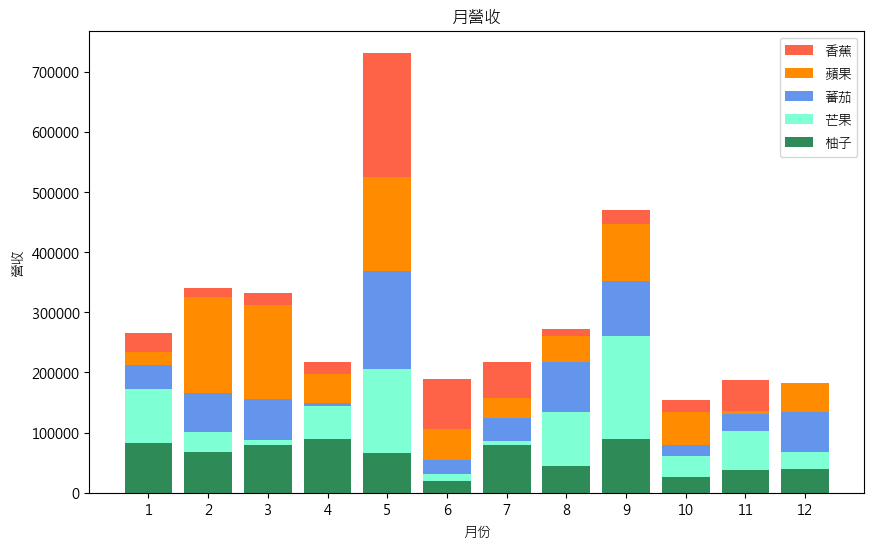

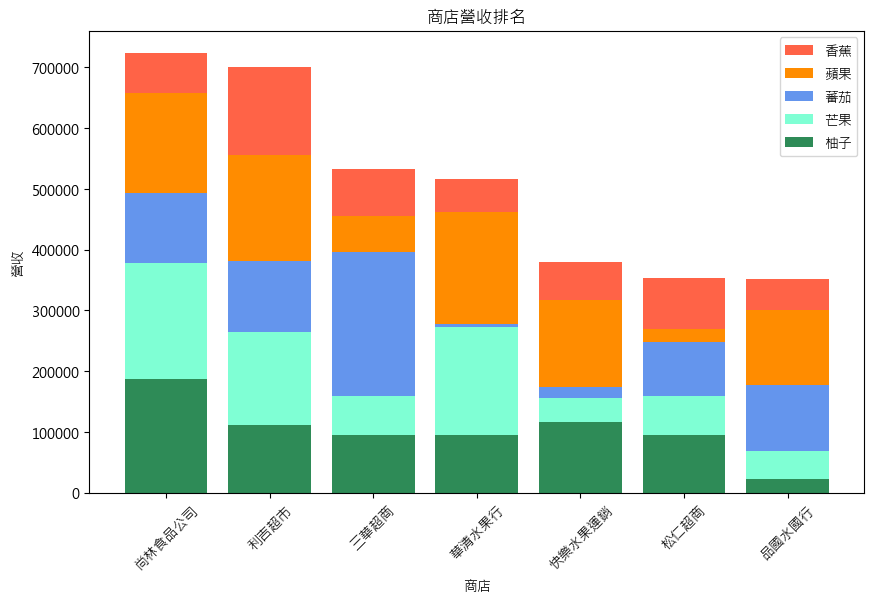

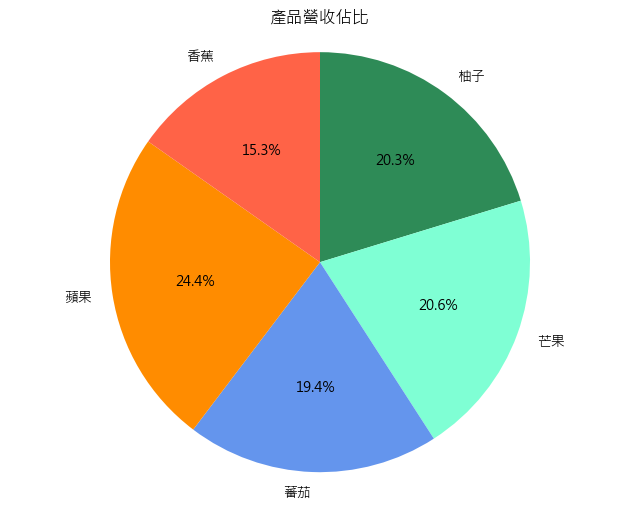

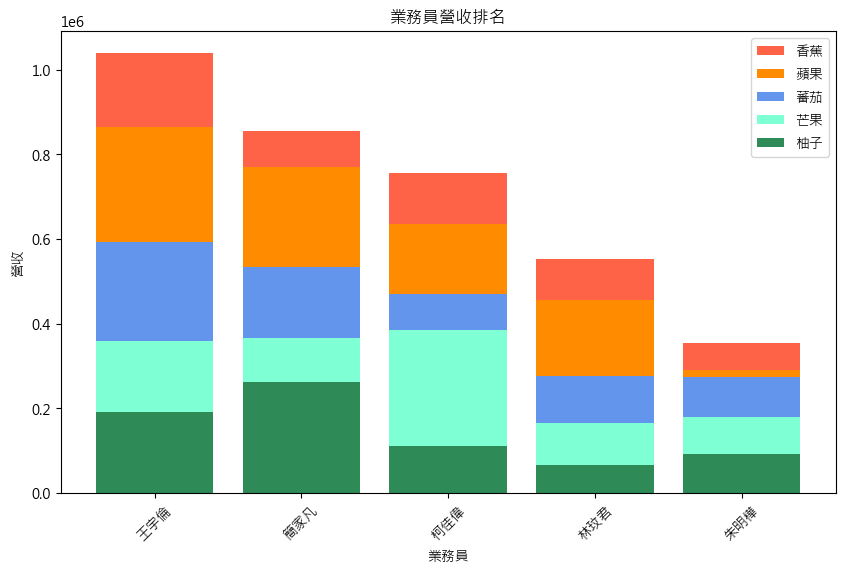

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 設定matplotlib字型
plt.rc('font', family='Microsoft JhengHei')  

# 讀取水果銷售資料
data = pd.read_excel('作業2_水果銷售資料.xlsx')

# 定義產品對應的顏色
product_colors = {'芒果': 'aquamarine', '柚子': 'seagreen', '蕃茄': 'cornflowerblue', '蘋果': 'darkorange', '香蕉': 'tomato'}

# 1. 月營收分析
monthly_revenue = data.groupby(['月份', '產品'])['金額'].sum().reset_index()
products = monthly_revenue['產品'].unique()

# 將月份轉換為數字以正確排序
monthly_revenue['月份'] = pd.to_numeric(monthly_revenue['月份'].str.extract('(\d+)', expand=False))

plt.figure(figsize=(10, 6))
months = sorted(monthly_revenue['月份'].unique())  # 獲取並正確排序所有月份
bottoms = np.zeros(len(months))  # 初始化底部位置

for product in products:
    color = product_colors.get(product, 'gray')  # 獲取產品對應的顏色
    values = [monthly_revenue[(monthly_revenue['月份'] == month) & (monthly_revenue['產品'] == product)]['金額'].sum() for month in months]
    plt.bar(months, values, bottom=bottoms, label=product, color=color)
    bottoms += values

plt.xlabel('月份')
plt.ylabel('營收')
plt.xticks(months)  # 設置X軸刻度為月份
plt.title('月營收')
ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1])
plt.savefig('月營收.png', bbox_inches='tight')

# 2. 按商店排名
store_revenue = data.groupby(['商店', '產品'])['金額'].sum().reset_index()
store_totals = store_revenue.groupby('商店')['金額'].sum().reset_index().sort_values('金額', ascending=False)
stores = store_totals['商店'].tolist()  # 獲取並排序商店

plt.figure(figsize=(10, 6))
bottoms = np.zeros(len(stores))  # 初始化底部位置

for product in products:
    color = product_colors.get(product, 'gray')  # 獲取產品對應的顏色
    values = [store_revenue[(store_revenue['商店'] == store) & (store_revenue['產品'] == product)]['金額'].sum() for store in stores]
    plt.bar(stores, values, bottom=bottoms, label=product, color=color)
    bottoms += values

plt.xticks(rotation=45)
plt.xlabel('商店')
plt.ylabel('營收')
plt.title('商店營收排名')
ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1])
plt.savefig('商店營收排名.png', bbox_inches='tight')

# 3. 熱銷產品
product_order = ['香蕉', '蘋果', '蕃茄', '芒果', '柚子'][::-1]  # 指定的產品順序
product_revenue = data.groupby('產品')['金額'].sum().reset_index()
product_revenue['產品'] = pd.Categorical(product_revenue['產品'], categories=product_order, ordered=True)
product_revenue = product_revenue.sort_values('產品')

plt.figure(figsize=(8, 6))
colors = [product_colors.get(product, 'gray') for product in product_revenue['產品']]  # 獲取每個產品對應的顏色
plt.pie(product_revenue['金額'], labels=product_revenue['產品'], autopct='%1.1f%%', colors=colors, startangle=90, counterclock=False)
plt.axis('equal')
plt.title('產品營收佔比')
plt.savefig('產品營收佔比.png', bbox_inches='tight')

# 4. 按業務員排名
salesperson_revenue = data.groupby(['業務員', '產品'])['金額'].sum().reset_index()
salesperson_totals = salesperson_revenue.groupby('業務員')['金額'].sum().reset_index().sort_values('金額', ascending=False)
salespersons = salesperson_totals['業務員'].tolist()  # 獲取並排序業務員

plt.figure(figsize=(10, 6))
bottoms = np.zeros(len(salespersons))  # 初始化底部位置

for product in products:
    color = product_colors.get(product, 'gray')  # 獲取產品對應的顏色
    values = [salesperson_revenue[(salesperson_revenue['業務員'] == salesperson) & (salesperson_revenue['產品'] == product)]['金額'].sum() for salesperson in salespersons]
    plt.bar(salespersons, values, bottom=bottoms, label=product, color=color)
    bottoms += values

plt.xticks(rotation=45)
plt.xlabel('業務員')
plt.ylabel('營收')
plt.title('業務員營收排名')
ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1])
plt.savefig('業務員營收排名.png', bbox_inches='tight')

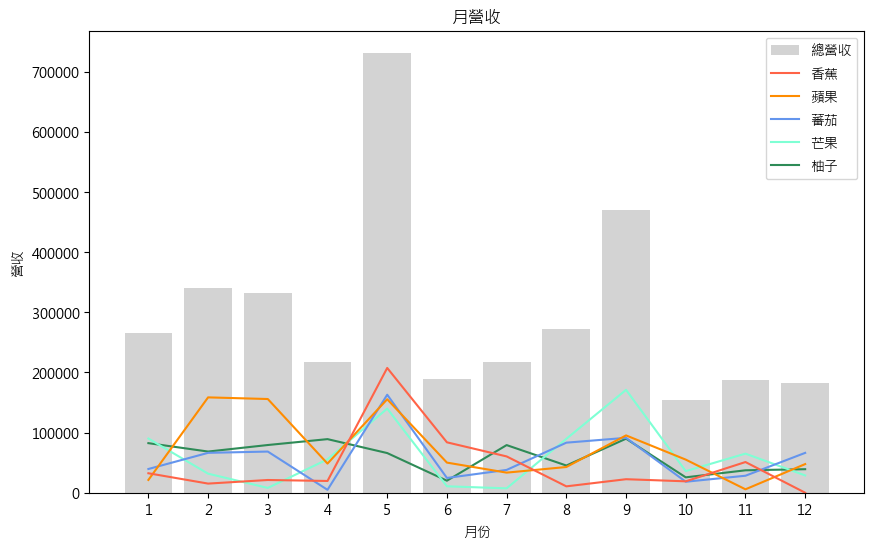

In [52]:
# 1. 月營收分析
monthly_revenue = data.groupby(['月份', '產品'])['金額'].sum().reset_index()
total_monthly_revenue = data.groupby('月份')['金額'].sum().reset_index()  # 總月營收

# 將月份轉換為數字以正確排序
monthly_revenue['月份'] = pd.to_numeric(monthly_revenue['月份'].str.extract('(\d+)', expand=False))
total_monthly_revenue['月份'] = pd.to_numeric(total_monthly_revenue['月份'].str.extract('(\d+)', expand=False))

plt.figure(figsize=(10, 6))
months = sorted(monthly_revenue['月份'].unique())  # 獲取並正確排序所有月份

# 繪製總月營收的長條圖
plt.bar(total_monthly_revenue['月份'], total_monthly_revenue['金額'], color='lightgray', label='總營收')

products = monthly_revenue['產品'].unique()
for product in products:
    color = product_colors.get(product, 'gray')  # 獲取產品對應的顏色
    values = [monthly_revenue[(monthly_revenue['月份'] == month) & (monthly_revenue['產品'] == product)]['金額'].sum() for month in months]
    plt.plot(months, values, label=product, color=color)

plt.xlabel('月份')
plt.ylabel('營收')
plt.xticks(months)  # 設置X軸刻度為月份
plt.title('月營收')
ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1])
plt.savefig('月營收.png', bbox_inches='tight')